In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

In [2]:
np.random.seed(42)

# 1. Import the train datasets

In [3]:
X_train = pd.read_csv("A_Normalised_train_data.csv",index_col=0)
Y_train = pd.read_csv("A_Log_sales_train.csv",index_col=0)

In [4]:
Model_1 = LinearRegression()

# 2. Setup Pipeline

In [5]:
poly = PolynomialFeatures()
pca=PCA()
SLR = Model_1

In [6]:
# Step 1: Polynomial transform
# Step 2: PCA
# Step 3: Model
pipe = Pipeline(steps=[("poly",poly),("pca",pca),("SLR",SLR)])

In [7]:
param_grid = {
    "pca__n_components": [45, 100 ,150 ,170],
    "poly__degree":[1,2]
}

# 3. Setup GridSearch

In [8]:
score_metric = 'neg_mean_squared_error'
search = GridSearchCV(pipe,param_grid,
                      n_jobs=-1,
                      cv=10,
                      scoring=score_metric)

In [9]:
search.fit(X_train,Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('pca', PCA()),
                                       ('SLR', LinearRegression())]),
             n_jobs=-1,
             param_grid={'pca__n_components': [45, 100, 150, 170],
                         'poly__degree': [1, 2]},
             scoring='neg_mean_squared_error')

In [10]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-0.789):
{'pca__n_components': 100, 'poly__degree': 1}


In [11]:
df = pd.DataFrame(search.cv_results_)
df = df.sort_values(by=['rank_test_score'])
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,param_poly__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
2,1.862501,0.843080,0.082983,0.076845,100,1,"{'pca__n_components': 100, 'poly__degree': 1}",-0.731604,-0.720879,-8.627484e-01,-0.833846,-9.393732e-01,-7.097942e-01,-0.666166,-7.915321e-01,-0.824856,-8.047515e-01,-7.885551e-01,7.803625e-02,1
0,1.789564,1.059684,0.032727,0.041621,45,1,"{'pca__n_components': 45, 'poly__degree': 1}",-0.803224,-0.796636,-9.689899e-01,-0.855450,-1.004065e+00,-7.069605e-01,-0.720404,-8.679688e-01,-0.888795,-9.775660e-01,-8.590059e-01,9.874489e-02,2
7,43.772690,15.875806,0.902824,0.479130,170,2,"{'pca__n_components': 170, 'poly__degree': 2}",-0.681453,-0.665326,-2.201826e+00,-0.763740,-9.058276e-01,-7.134524e-01,-0.635589,-6.932354e-01,-0.843513,-8.122975e-01,-8.916259e-01,4.442783e-01,3
5,50.474733,18.609281,1.080133,0.722317,150,2,"{'pca__n_components': 150, 'poly__degree': 2}",-0.705712,-0.699851,-2.084749e+00,-0.816254,-9.518173e-01,-7.387349e-01,-0.669613,-7.117442e-01,-0.847762,-8.364955e-01,-9.062733e-01,4.015008e-01,4
3,52.095190,13.735350,1.879207,0.912921,100,2,"{'pca__n_components': 100, 'poly__degree': 2}",-0.901700,-0.874450,-1.014074e+00,-1.000132,-1.163212e+00,-8.726599e-01,-0.835424,-9.040172e-01,-1.001558,-1.026390e+00,-9.593617e-01,9.431844e-02,5
1,39.322145,5.289329,2.695195,2.247064,45,2,"{'pca__n_components': 45, 'poly__degree': 2}",-1.248041,-1.233714,-1.272664e+00,-1.442198,-1.467154e+00,-9.984640e-01,-1.232960,-1.226382e+00,-1.256712,-1.306531e+00,-1.268482e+00,1.219926e-01,6
4,2.335763,0.917631,0.022771,0.029580,150,1,"{'pca__n_components': 150, 'poly__degree': 1}",-0.512133,-0.569253,-2.564365e+25,-0.633127,-7.563299e+24,-2.796497e+24,-0.581328,-1.890418e+25,-0.670868,-1.070161e+25,-6.560923e+24,8.741028e+24,7
6,1.244128,0.825886,0.191359,0.147377,170,1,"{'pca__n_components': 170, 'poly__degree': 1}",-0.508346,-0.564813,-8.601736e+26,-0.611982,-4.182862e+25,-6.613890e+26,-0.593203,-1.502600e+26,-0.670370,-7.206934e+26,-2.434345e+26,3.359252e+26,8


# 4. Best Hyperparameter

In [12]:
parms = pd.DataFrame(df['params'])
for i in parms.iloc[0]:
    print(i)

{'pca__n_components': 100, 'poly__degree': 1}


# 5. Evaluate Model $log(Sales)$

In [13]:
best_pca =parms.iloc[0][0]['pca__n_components']
best_degree=parms.iloc[0][0]['poly__degree']


In [14]:
Model_2 = LinearRegression()

In [15]:
poly1 = PolynomialFeatures(degree=best_degree)

In [16]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_train,Y_train,test_size=0.2,random_state=132)


In [17]:
pca1 = PCA(n_components=best_pca)
X_train1 = poly1.fit_transform(X_train1)
pca1.fit(X_train1)
PX_train1 = pca1.transform(X_train1)
SLR1 = Model_2
SLR1.fit(PX_train1,Y_train1)

LinearRegression()

In [18]:
pca2 = PCA(n_components=best_pca)
X_test1=poly1.fit_transform(X_test1)
pca2.fit(X_test1)
PX_test1 = pca2.transform(X_test1)

In [19]:
MSE(SLR1.predict(PX_test1),Y_test1)

2.1073212306216047

In [20]:
result = pd.DataFrame(np.exp(Y_test1))

In [21]:
result["Predicted_sales"] = np.exp(SLR1.predict(PX_test1))

In [22]:
MSE(result["sales"],result["Predicted_sales"])

1271.10300272211

# 5.1 Model using original sales data

In [23]:
Model_3 = LinearRegression()

In [24]:
OY_train = pd.read_csv("A_sales_train.csv",index_col=0)

In [25]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X_train,OY_train,test_size=0.2,random_state=132)

In [26]:
pca3 = PCA(n_components=best_pca)
X_train2 = poly1.fit_transform(X_train2)
pca3.fit(X_train2)
PX_train2 = pca3.transform(X_train2)
SLR2 = Model_3
SLR2.fit(PX_train2,Y_train2)

LinearRegression()

In [27]:
pca4 = PCA(n_components=best_pca)
X_test2=poly1.fit_transform(X_test2)
pca4.fit(X_test2)
PX_test2 = pca4.transform(X_test2)

In [28]:
MSE(SLR2.predict(PX_test2),Y_test2)

1908.1163565328227

#### Notably model trained on log(Sales) has lower out-of-sample MSE than model with unmodified Sales

# 6. Inventory Decision

In [29]:
residual = result['sales']-result['Predicted_sales']

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [30]:
Price=20
Cost=12
Salvage=8
Over=Cost - Salvage
Under=Price - Cost
Over, Under

(4, 8)

### QQ plot to explore the distribution of residual

#### Normal Distribution

In [31]:
import scipy.stats as sct

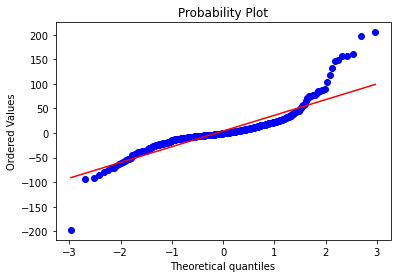

In [32]:
import scipy
scipy.stats.probplot(residual, dist="norm", plot=plt)
plt.show()

In [33]:
s = residual.std()
opt_dec_N=np.ceil(sct.norm.ppf(Under/(Under+Over))*s + result['Predicted_sales'])

#### Exponential Distribution

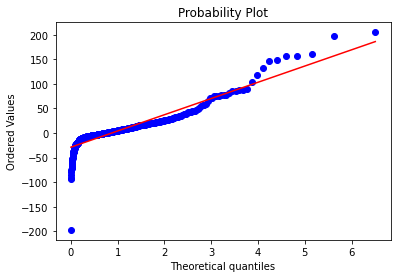

In [34]:
scipy.stats.probplot(residual, dist="expon", plot=plt)
plt.show()

In [35]:
opt_dec_E=np.ceil((-result['Predicted_sales'])*np.log(1-(Under/(Under+Over))))

#### Empirical Distribution

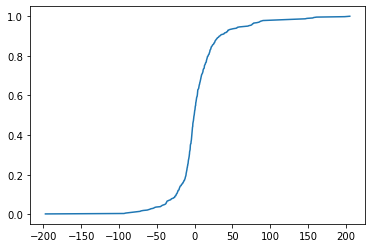

In [36]:
size = residual.shape[0]
step=1/size
jumps = [step*i for i in range(1,size+1)]
Sample = sorted(residual)
plt.plot(Sample,jumps)

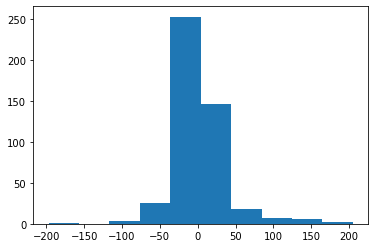

In [37]:
plt.hist(Sample)
plt.show()

In [38]:
def inv(sample,jump,area):
    size = len(sample)
    i=0
    temp=jump[i]
    while temp<area:
        i+=1
        temp=jump[i]
        
    return sample[i]

In [39]:
offset = inv(Sample,jumps,2/3)
offset

7.126905178048888

In [40]:
opt_dec_B = np.ceil(result['Predicted_sales']+offset)

# 7. Out-of-samples Profit

In [41]:
#max profit for test data set
max_profit = result['sales'].sum()*(Price-Cost)
max_profit

82096.0

In [42]:
def profit(demand,inv):
    return (Price-Salvage)*np.minimum(demand,inv)-(Cost-Salvage)*inv

In [43]:
#Profit (None)
profit_lst = profit(round(result['sales']),round(result['Predicted_sales']))
profit_lst.sum()

20860.0

In [44]:
#Profit (Normal)
profit_lst_N = profit(result['sales'],opt_dec_N)
profit_lst_N.sum()

20588.0

In [45]:
#Profit (Exponential)
profit_lst_E = profit(result['sales'],opt_dec_E)
profit_lst_E.sum()

20680.0

In [46]:
#Profit (Empirical)
profit_lst_B = profit(result['sales'],opt_dec_B)
profit_lst_B.sum()

23424.0

# 8. K-Fold Cross Validation

### Repeat steps 5,6,7 with 10-fold cross validation

In [47]:
Model_4=LinearRegression()

In [55]:
from sklearn.model_selection import KFold
k=10
kf = KFold(n_splits=k)
X_train_t=X_train.to_numpy()
Y_train_t=Y_train.to_numpy()
model = []
mse_lst = []
max_profit_lst = []
profit_N_lst = []
profit_E_lst = []
profit_B_lst = []

for train_index,test_index in kf.split(X_train_t):
    X_train_K,X_test_K=X_train_t[train_index],X_train_t[test_index]
    Y_train_K,Y_test_K=Y_train_t[train_index],Y_train_t[test_index]
    
    #PCA to transform train data
    pca_K1 = PCA(n_components=best_pca,random_state=42)
    X_train_K = poly1.fit_transform(X_train_K)
    pca_K1.fit(X_train_K)
    PX_train_K = pca_K1.transform(X_train_K)
    
    #Model
    SLR_K = Model_4
    SLR_K.fit(PX_train_K,Y_train_K)
    
    #pca to transform test data
    pca_K2 = PCA(n_components=best_pca,random_state=42)
    X_test_K=poly1.fit_transform(X_test_K)
    pca_K2.fit(X_test_K)
    PX_test_K = pca_K2.transform(X_test_K)
    
    #MSE
    mse_lst.append(MSE(np.exp(SLR_K.predict(PX_test_K)),np.exp(Y_test_K)))
    
    #Transform log(sale) back to sale
    result_K = pd.DataFrame(np.exp(Y_test_K))
    result_K["Predicted_sales"] = np.exp(SLR_K.predict(PX_test_K))
    
    #Obtain residual
    residual_K = result_K[0]-result_K['Predicted_sales']
    
    #Get std for Normal distribution
    s_K = residual_K.std()
    
    #Inventory Decision (Normal)
    opt_dec_N_K=np.ceil(sct.norm.ppf(Under/(Under+Over))*s_K + result_K['Predicted_sales'])
    #Inventory Decision (Exponential)
    opt_dec_E_K=np.ceil((-result_K['Predicted_sales'])*np.log(1-(Under/(Under+Over))))
    
    #Inventory Decision (Empirical Distribution)
    size_K = residual_K.shape[0]
    step_K=1/size_K
    jumps_K = [step_K*i for i in range(1,size_K+1)]
    Sample_K = sorted(residual_K)
    offset_K = inv(Sample_K,jumps_K,2/3)
    opt_dec_B_K = np.ceil(result_K['Predicted_sales']+offset_K)
    
    #Out-of_sample profit
    profit_lst_B_K = profit(result_K[0],opt_dec_B_K)
    profit_B_lst.append(profit_lst_B_K.sum())
    
    profit_lst_N_K = profit(result_K[0],opt_dec_N_K)
    profit_N_lst.append(profit_lst_N_K.sum())
    
    profit_lst_E_K = profit(result_K[0],opt_dec_E_K)
    profit_E_lst.append(profit_lst_E_K.sum())
    
    max_profit_K = result_K[0].sum()*(Price-Cost)
    max_profit_lst.append(max_profit_K)
    
max_profit_lst = np.array(max_profit_lst)
profit_N_lst = np.array(profit_N_lst)
profit_E_lst = np.array(profit_E_lst)
profit_B_lst = np.array(profit_B_lst)

fraction_of_max_N = profit_N_lst/max_profit_lst
fraction_of_max_E = profit_E_lst/max_profit_lst
fraction_of_max_B = profit_B_lst/max_profit_lst

dist_profit = ["Normal","Exponential","Empirical","Max"]
dist_frac = ["Normal","Exponential","Empirical"]
col_name = ["Dataset_"+str(i) for i in range(1,k+1)]

profit_lst = [profit_N_lst,profit_E_lst,profit_B_lst,max_profit_lst]
profit_table = pd.DataFrame(profit_lst,index=dist_profit,columns=col_name)
profit_table["mean_profit"]=profit_table.mean(axis=1)
profit_table["std_profit"]=profit_table.std(ddof=1,axis=1)

fraction_lst = [fraction_of_max_N,fraction_of_max_E,fraction_of_max_B]
fraction_table = pd.DataFrame(fraction_lst,index=dist_frac,columns=col_name)
fraction_table["mean_fraction"]=fraction_table.mean(axis=1)

In [56]:
fraction_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_fraction
Normal,-0.329306,0.158123,-0.613876,0.155880,-0.068090,0.011985,-1.139193,0.190546,0.173944,-0.421341,-0.188133
Exponential,0.103228,0.185434,-0.181787,0.205837,0.076551,0.123745,-0.055955,0.160191,0.193092,0.008452,0.081879
Empirical,0.152909,0.243504,-0.098497,0.244979,0.113940,0.189408,0.007352,0.217606,0.238278,0.063869,0.137335


In [57]:
profit_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_profit,std_profit
Normal,-13628.0,7156.0,-28420.0,7264.0,-3380.0,468.0,-55784.0,8788.0,7776.0,-17548.0,-8730.8,19759.174157
Exponential,4272.0,8392.0,-8416.0,9592.0,3800.0,4832.0,-2740.0,7388.0,8632.0,352.0,3610.4,5437.600412
Empirical,6328.0,11020.0,-4560.0,11416.0,5656.0,7396.0,360.0,10036.0,10652.0,2660.0,6096.4,4990.235089
Max,41384.0,45256.0,46296.0,46600.0,49640.0,39048.0,48968.0,46120.0,44704.0,41648.0,44966.4,3203.875254


In [58]:
mse_table = pd.DataFrame(mse_lst,index=col_name,columns=['Cross Validation MSE'])
mse_table

,Cross Validation MSE
Dataset_1,12440.800423
Dataset_2,3193.272218
Dataset_3,18128.141328
Dataset_4,3137.565040
Dataset_5,5750.328471
Dataset_6,4243.556300
Dataset_7,49313.797507
Dataset_8,2025.403800
Dataset_9,2467.686367
Dataset_10,12249.116286


In [59]:
print(f"Average 10 fold CV MSE:  {float(mse_table.mean())}")

Average 10 fold CV MSE:  11294.966773976312


In [60]:
name = "2.2A_Poly_reg.csv"
mse_table.to_csv(f".\\Model_CV_Result_MSE\\{name}")

In [61]:
f = pd.DataFrame(fraction_table['mean_fraction'])
f = f.transpose().reset_index()
f.to_csv(f".\\Model_CV_Result_Efficiency\\{name}")